In [1]:
import os
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
animals = os.listdir("D:\Projects\Animal Classification")
print(animals)
print(len(animals))

['cats', 'dogs', 'snakes']
3


In [3]:
import cv2
path = "D://Projects//Animal Classification//"

im_size = 90

images = []
labels = []

for i in animals:
    im_path = path + str(i)
    files_name = [i for i in os.listdir(im_path) if i.endswith("jpg")]
    for f in files_name:
        img = cv2.imread(im_path+"//"+f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [4]:
images = np.array(images)
images = images.astype('float32')/255
images

array([[[[0.00392157, 0.08627451, 0.09411765],
         [0.00784314, 0.07843138, 0.08235294],
         [0.        , 0.05098039, 0.05098039],
         ...,
         [0.09411765, 0.11764706, 0.08235294],
         [0.07058824, 0.10196079, 0.0627451 ],
         [0.09411765, 0.1254902 , 0.08627451]],

        [[0.        , 0.09019608, 0.09803922],
         [0.01176471, 0.08235294, 0.08627451],
         [0.00392157, 0.05490196, 0.05490196],
         ...,
         [0.10196079, 0.12941177, 0.09411765],
         [0.06666667, 0.10196079, 0.0627451 ],
         [0.07450981, 0.10980392, 0.07058824]],

        [[0.        , 0.09411765, 0.10196079],
         [0.00392157, 0.08627451, 0.09019608],
         [0.00392157, 0.0627451 , 0.05882353],
         ...,
         [0.1254902 , 0.15686275, 0.11764706],
         [0.07843138, 0.11372549, 0.07450981],
         [0.07450981, 0.10980392, 0.07058824]],

        ...,

        [[0.3254902 , 0.37254903, 0.43137255],
         [0.4117647 , 0.45882353, 0.54901963]

In [5]:
images.shape

(2999, 90, 90, 3)

In [6]:
x = images
y = labels

In [7]:
l_encoder = LabelEncoder()
y = l_encoder.fit_transform(y)

In [8]:
y

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [9]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [10]:
x, y = shuffle(x, y, random_state=30)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2009, 90, 90, 3)
(2009,)
(990, 90, 90, 3)
(990,)


In [11]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(90, 90, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')  # Output layer for 3 classes
])


C:\Users\debku\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 88, 88, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 44, 44, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 42, 42, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 21, 21, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28224)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,612,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,632,579 (13.86 MB)

 Trainable params: 3,632,579 (13.86 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'
    ])

In [14]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 174ms/step - accuracy: 0.3868 - loss: 1.5750
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.5952 - loss: 0.8475
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 169ms/step - accuracy: 0.6781 - loss: 0.6897
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.7472 - loss: 0.5774
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.8157 - loss: 0.4974
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - accuracy: 0.8736 - loss: 0.3299
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 235ms/step - accuracy: 0.9168 - loss: 0.2374
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 182ms/step - accuracy: 0.9451 - loss: 0.1569
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 184ms/step - accuracy: 0.9639 - loss: 0.1221
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step - accuracy: 0.9800 - loss: 0.0785
Epoch 11/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 217ms/step - accuracy: 0.9957 - loss: 0.0356
Epoch 12/100
63/63 ━━━━━━━━━━━

63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 197ms/step - accuracy: 1.0000 - loss: 2.7295e-05
Epoch 67/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 196ms/step - accuracy: 1.0000 - loss: 2.4471e-05
Epoch 68/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 187ms/step - accuracy: 1.0000 - loss: 2.6274e-05
Epoch 69/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 184ms/step - accuracy: 1.0000 - loss: 2.2598e-05
Epoch 70/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 189ms/step - accuracy: 1.0000 - loss: 2.1997e-05
Epoch 71/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 1.0000 - loss: 2.2412e-05
Epoch 72/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 199ms/step - accuracy: 1.0000 - loss: 2.2111e-05
Epoch 73/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 1.0000 - loss: 1.8646e-05
Epoch 74/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - accuracy: 1.0000 - loss: 1.7465e-05
Epoch 75/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - accuracy: 1.0000 - loss: 1.8031e-05
Epoch 76/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 199ms/step - accuracy: 1.0000 - loss: 1

In [15]:
import numpy as np

# Get predictions as probabilities
pred_probabilities = model.predict(X_test)

# Convert probabilities to class indices
pred_y = np.argmax(pred_probabilities, axis=1)

# Print the predicted class indices
print(pred_y)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step
[0 0 2 2 1 2 1 0 0 1 2 1 0 0 0 0 2 2 1 2 0 1 2 1 0 1 2 0 2 0 2 2 0 2 2 2 0
 2 0 2 2 2 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 2 2 2 2 1 0 0 2 1 0 1 2 0 0 1
 2 1 1 1 0 0 1 1 1 1 1 2 0 2 0 0 0 0 1 1 1 0 2 0 1 1 2 2 0 1 0 0 2 0 2 2 0
 2 2 0 0 2 1 1 1 0 2 0 1 0 0 1 2 1 2 0 2 2 1 1 0 0 1 1 2 2 0 0 1 0 1 1 1 1
 1 0 2 0 2 1 1 0 0 1 2 1 0 2 0 0 2 2 2 2 1 2 0 0 0 2 2 0 0 2 0 2 1 0 0 1 0
 0 0 2 2 1 0 1 0 2 0 2 2 0 0 2 1 0 0 0 0 0 1 0 0 0 2 0 0 1 1 0 0 2 2 2 2 2
 2 1 0 1 1 2 1 1 2 2 2 2 2 0 1 0 1 1 2 0 0 2 1 2 1 1 1 1 1 0 1 1 0 2 2 2 1
 0 1 1 0 1 2 0 0 2 1 0 0 0 2 0 1 1 2 1 0 2 2 1 0 0 1 2 0 2 1 1 2 0 0 0 2 0
 1 0 1 1 2 2 2 0 0 2 1 1 1 0 0 2 1 1 0 0 2 0 2 2 0 0 0 2 0 0 1 0 0 2 2 1 1
 1 0 0 2 2 0 2 2 2 2 1 1 2 2 2 1 2 1 2 2 1 1 2 0 0 0 2 2 1 0 2 1 1 2 0 1 2
 2 0 1 2 0 2 1 0 2 2 1 1 1 2 0 1 1 1 0 1 2 1 0 0 1 0 2 0 2 0 2 0 1 0 1 2 1
 0 2 1 2 2 0 1 2 1 0 2 1 0 0 2 0 1 1 0 2 0 2 1 2 2 1 2 1 1 1 2 1 1 1 2 1 2
 1 2 2 0 0 1 2 2 1 0 0 0 2 2 0 2 1 2 2 1 0 1 1 2 0 0 2 1 2 1

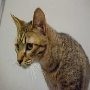

In [31]:
from tensorflow.keras.utils import load_img
img = load_img("D://Projects//Animal Classification//cats//0_0023.jpg", target_size=(90, 90, 3))
img

In [32]:
img = np.array(img)
img.shape

(90, 90, 3)

In [33]:
img = img.reshape((1, img.shape[0], img.shape[1],img.shape[2]))
img = img / 255.0

In [34]:
test_flower = model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [37]:
res = np.argmax(test_flower, axis=1)

# Print the predicted class indices
print(animals[res])



TypeError: only integer scalar arrays can be converted to a scalar index